# Vizualisation of infiltration into a sand column
Water is infiltrated into a sand column and ERT datasets are collected throughout the infiltration. In this example we will invert them with ResIPy using a custom mesh (build withing gmsh UI).

In [1]:
import sys
sys.path.append('../src')
from resipy import Project
import numpy as np
import pyvista as pv
testdir = '../src/examples/'

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.2.2
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Let's import the surveys, electrodes (with correct label `<string> <elecNumber>`) and vizualise the mesh. The mesh actually has two regions: the top region is the sand where the ERT measurements are done. The bottom region is gravels which are just used for drainage. Note that the last two rings of electrodes which are in the gravels are not actually used in the sequence. However, for correct ERT modelling the entire column needs to be modelled.

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
4/4 imported
Reading ../src/examples/dc-3d-timelapse-column/mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 4866 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


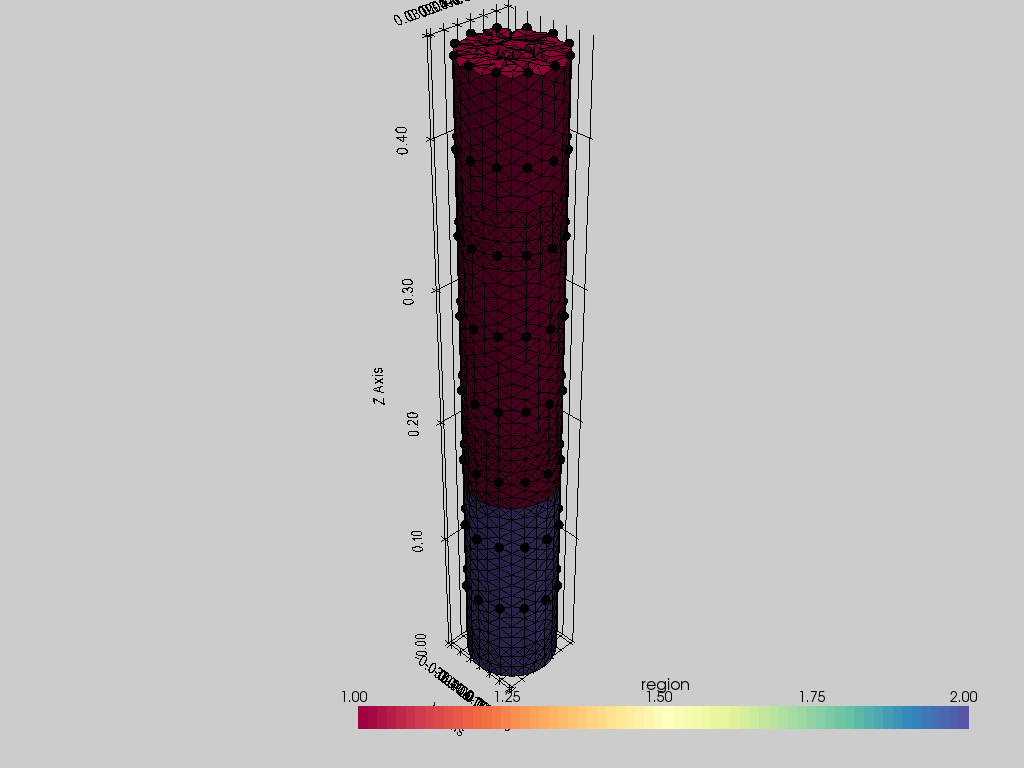

In [2]:
k = Project(typ='R3t')
k.createTimeLapseSurvey(testdir + 'dc-3d-timelapse-column/data', ftype='ProtocolDC')
k.importElec(testdir + 'dc-3d-timelapse-column/elec.csv')
k.importMesh(testdir + 'dc-3d-timelapse-column/mesh.msh')
k.showMesh()

Now invert the data. Note that to avoid automatic cropping of the mesh to the region of interest (defined by the maximum extend of the electrodes locations), we need to setup `num_xy_poly` to 0 and `zmin` and `zmax` to $-\infty$ and $+\infty$ respectively.

In [3]:
k.param['num_xy_poly'] = 0
k.param['zmin'] = -5
k.param['zmax'] = 1
k.invert(parallel=True)

Writing .in file and protocol.dat... Matching quadrupoles between surveys for difference inversion...100 in common...done in 0.012795s
done!
------------ INVERTING REFERENCE SURVEY ---------------


 >> R 3 t     E R T    M o d e l    v 2.30 <<

 >> Date: 26-01-2021
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          0.083 Gb
    For   2000 measurements the m

Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


empty mesh


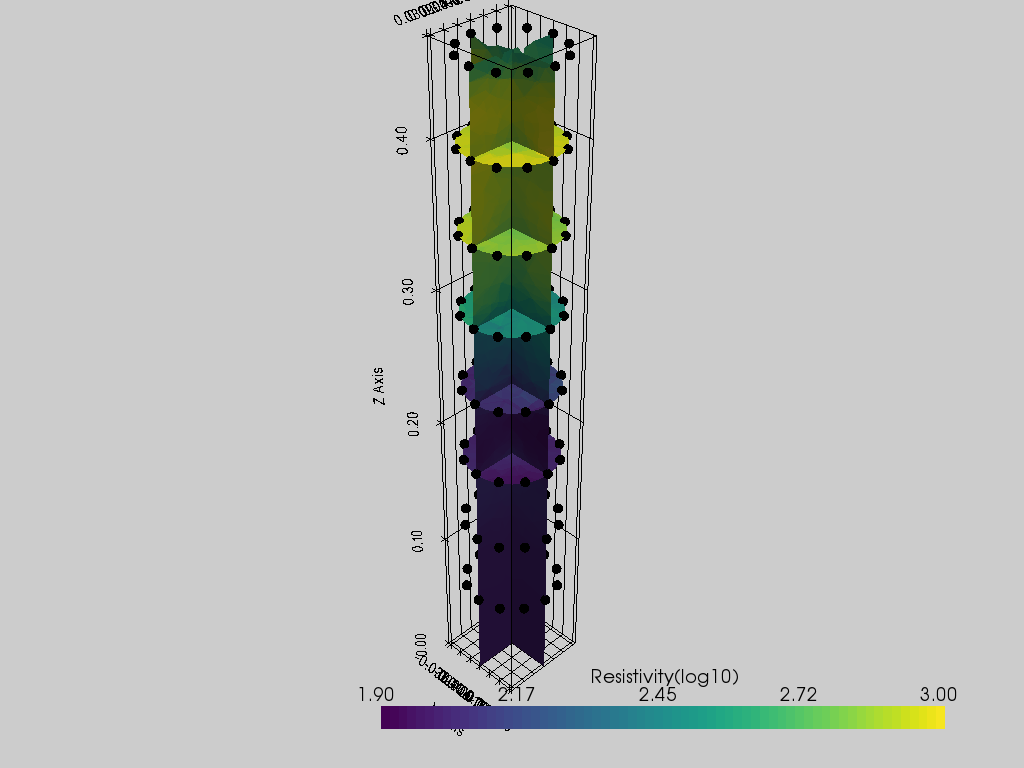

In [4]:
k.showResults(index=0, pvslices=[[0],[0], np.linspace(0.175, 0.455, 6)]) # background model

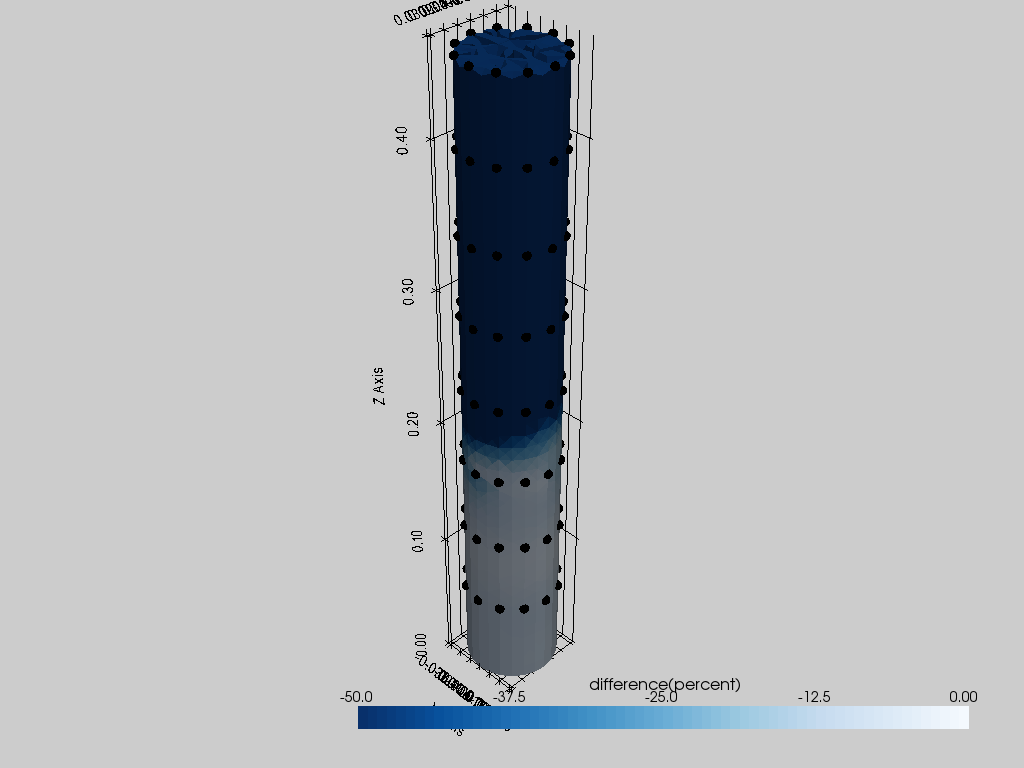

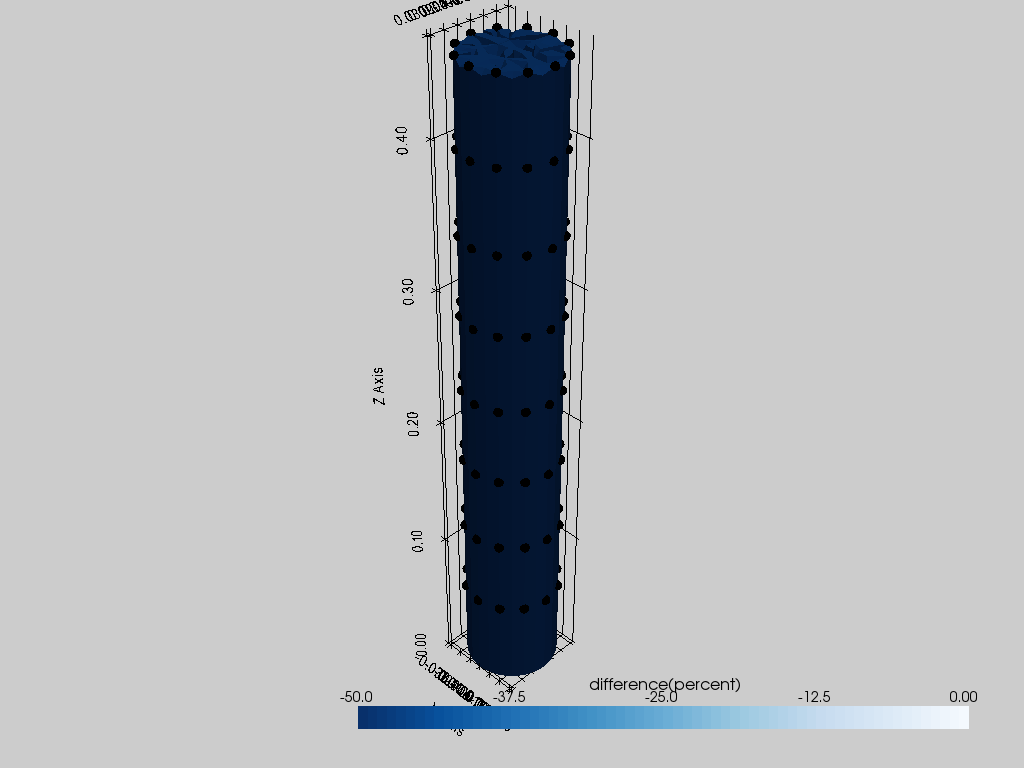

In [5]:
k.showResults(index=1, attr='difference(percent)', vmin=-50, vmax=0, color_map='Blues_r')
k.showResults(index=2, attr='difference(percent)', vmin=-50, vmax=0, color_map='Blues_r')